### Dataset Likn https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction

In [325]:
import pandas as pd
import numpy as np

In [326]:
df = pd.read_csv('Churn_Modelling.csv')

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [328]:
df.duplicated().sum()

0

In [329]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [330]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [331]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [332]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [333]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [334]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [335]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['Exited'])
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [336]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

In [337]:
x_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [338]:
x_train_scaled.shape

(8000, 11)

# ANN

In [339]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input

In [340]:
model = Sequential(
    [
        Input(shape=(11,)),
        Dense(11, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

In [341]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

In [342]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [349]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8528 - loss: 0.3650 - val_accuracy: 0.8506 - val_loss: 0.3617
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8525 - loss: 0.3608 - val_accuracy: 0.8494 - val_loss: 0.3582
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8562 - loss: 0.3572 - val_accuracy: 0.8531 - val_loss: 0.3558
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8569 - loss: 0.3543 - val_accuracy: 0.8519 - val_loss: 0.3542
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8589 - loss: 0.3522 - val_accuracy: 0.8531 - val_loss: 0.3517
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8586 - loss: 0.3501 - val_accuracy: 0.8525 - val_loss: 0.3506
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8578 - loss: 0.3486 - val_accuracy: 0.8550 - val_loss: 0.3495
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8594 - loss: 0.3475 - val_accuracy: 

In [354]:
print(history.history)

{'accuracy': [0.8528125286102295, 0.8525000214576721, 0.856249988079071, 0.8568750023841858, 0.8589062690734863, 0.858593761920929, 0.8578125238418579, 0.859375, 0.8598437309265137, 0.8610937595367432], 'loss': [0.36501801013946533, 0.36078816652297974, 0.3572293519973755, 0.35431212186813354, 0.3521694839000702, 0.35010674595832825, 0.34855857491493225, 0.3474700152873993, 0.3464224934577942, 0.34526965022087097], 'val_accuracy': [0.8506249785423279, 0.8493750095367432, 0.8531249761581421, 0.8518750071525574, 0.8531249761581421, 0.8525000214576721, 0.8550000190734863, 0.8556249737739563, 0.8531249761581421, 0.8512499928474426], 'val_loss': [0.361672043800354, 0.358207106590271, 0.35578975081443787, 0.354218989610672, 0.3517329692840576, 0.35055074095726013, 0.34954291582107544, 0.34845852851867676, 0.3475814759731293, 0.3473607301712036]}


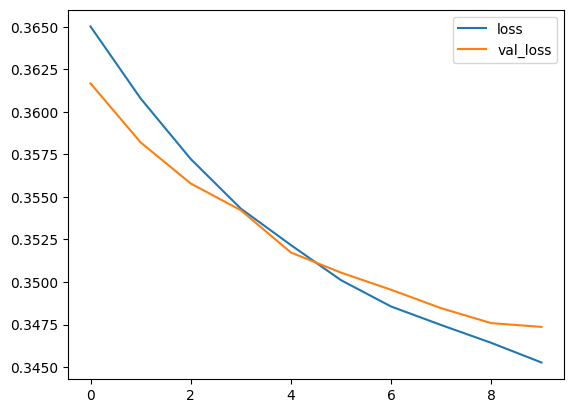

In [359]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

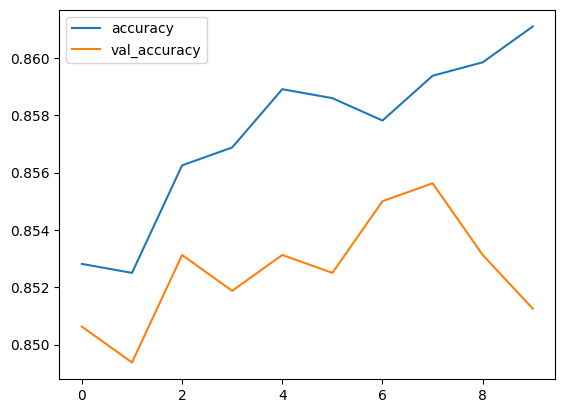

In [360]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [344]:
model.layers[0].get_weights()

[array([[ 0.34815758, -0.4536522 , -0.08590033,  0.45544025,  0.05267332,
          0.2140757 , -0.36386552,  0.33676016, -0.0831085 ,  0.11039035,
         -0.10039061],
        [ 0.33820423,  0.22320908, -0.7567846 , -1.1662596 ,  0.15824457,
          0.3422807 , -0.64867824, -0.09444188,  0.394249  ,  0.487947  ,
          0.08106797],
        [-0.00660214,  0.08395093,  0.01914799,  0.01158967, -0.12326751,
         -0.34763163,  0.2916125 ,  0.14096096,  0.06788277,  0.06738631,
          0.15136804],
        [-0.3317273 ,  0.41901445,  0.33601   , -0.16143435,  0.48804823,
          0.24015129, -0.513312  ,  0.4489132 ,  0.52979094, -0.4054264 ,
         -0.01504258],
        [ 0.10688057,  0.3600587 , -0.05607944, -0.00794961,  0.8154725 ,
         -0.02112161,  0.20093672, -0.01254609, -0.17070062, -1.6780957 ,
          0.8292764 ],
        [ 0.5045887 , -0.34965008, -0.25246087,  0.26683605, -0.0392363 ,
         -0.26882875,  0.00351607,  0.14306416, -0.10992189, -0.0837500

In [345]:
model.layers[1].get_weights()

[array([[-0.37184748],
        [ 0.22686659],
        [-0.74914896],
        [-0.45870617],
        [ 0.8028353 ],
        [-0.4106518 ],
        [-0.64329886],
        [ 0.05115663],
        [-0.25726193],
        [ 0.63288033],
        [ 0.35410976]], dtype=float32),
 array([-0.33010772], dtype=float32)]

In [346]:
y_pred = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [347]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [348]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.856
